HW6
Semi-Supervised Test (M=1) iteration

Serves the same purpose as for Supervised case, that is,
To get a feel of the code workings
To perform the single time tasks
Looping for Monte Carlo with M=30 after performing once is rather easy


STEPS for a SINGLE ITERATION (M=1)

- Split into train and test randomly
- Split train into L and U (according to required proportions) (ignore labels of U) randomly
- Stick, for a single iteration, with the obtained L, U, test (obvious; restating for relevance)
- Train on L using CV (5-fold) to select C, Penalty
- Once C selected over L, keep it constant for that Monte-Carlo iteration      (For C)

- Once C selected, retrain over entire L. Classify U.                           (1)
- Select point in U farthest from SVM hyperplane (current SVM's) (SVM trained in 1)
- Classify using (1), this point in U
- Update L (add this point to L)                                     (L')
- Update U (remove this point from U)                                (U')
- Go back to (1) and repeat till U is empty


- Once U is empty, retrain on the final 'whole' L, with C obtained in (For C)
- Use this SVM for all the scores over train and test (Final SVM)



For Monte Carlo, repeat above procedure for M=30 times

ASSUMPTIONS :
Ideally after L and U updation (L' and U') we should reselect C again using 5-fold CV. Obviously if train originally had, say, 400 points, L initial and U initial = ~200

So L and U updated 200 times. Cross Validating again over C is extremely expensive, every single time. It does not make sense especially if M=30, run time will be extremely large.

Two solutions to this :
1. Count total updations that will be performed. At 'interim-intervals' over these counts, recalibrate for new C, Penalty
2. Stick with the C obtained in (For C)

As such, option 1. seems accurate, as it does the following :

- L updations are ~200, say
- It keeps a counter of updations
- Say after every 50 updations it recalibrates for new C, so C will be selected 4 times after being initially selected

Also option 1. is not computationally taxing, however it will increase the run times heavily.

We will thus, 
STICK to the C initially selected. Not the most accurate, we assume it is still appropriate especially with the run time constraints. Thus we use option 2. and the algorithm given for the single iteration is also for this 'lenient-straight-forward' option

Additionally, as always, for simplicity, we assume Normalization happens only ONCE, before all these steps, in a 'given normalized dataset' sense. Pipelineing for Normalizations shouldn't be difficult and would require 1-2 additional line of codes, however we presume that for simplicity and to see 'the actual algorithm we are performing', a pre-normalization is done initially.

In line with these assumptions and algorithms, we perform Semi-Supervised Learning, A. and B. for a single iteration, looping subsequently in the next section the single iteration code.

ASSUMPTION FOR RANGE SELECTION OF C
Also Range Selection of C won't be done again, the same range will be used again, here, as L1 Linear SVC is used again here
While, it ideally should be selected again for this particular example, we will assume, the same range is valid enough

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('wdbc.csv', header = None)


output = df.iloc[:,0]


for i in np.arange(0,df.shape[0]):
    if output.iloc[i] == 'B':
        output.iloc[i] = 0
    else:
        output.iloc[i] = 1



features = df.iloc[:,1:]


from sklearn.preprocessing import normalize

features_normal = normalize(features)


features_normal_df = pd.DataFrame(features_normal)


norm_whole = pd.concat([features_normal_df,output],axis=1)


col_head = norm_whole.columns


norm_whole.columns= ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','y']


norm_whole.sort_values(by=['y'],inplace=True)


norm_whole.reset_index(drop=True,inplace=True)


X_y_0 = norm_whole.iloc[0:357,:]
X_y_1 = norm_whole.iloc[357:569,:]
X_y_1.reset_index(drop=True,inplace=True)


from sklearn.model_selection import train_test_split

X_y_train_0,X_y_test_0 = train_test_split(X_y_0,test_size = 0.2,shuffle=True)
X_y_train_1,X_y_test_1 = train_test_split(X_y_1,test_size = 0.2,shuffle=True)

X_y_train_0_l, X_y_train_0_u = train_test_split(X_y_train_0,test_size = 0.5, shuffle=True) 
X_y_train_1_l, X_y_train_1_u = train_test_split(X_y_train_1,test_size = 0.5, shuffle=True)


X_y_train = pd.concat([X_y_train_0_l,X_y_train_1_l],axis=0)
X_y_train_u = pd.concat([X_y_train_0_u,X_y_train_1_u],axis=0)
X_y_test = pd.concat([X_y_test_0,X_y_test_1],axis=0)


from sklearn.utils import shuffle

X_y_train = shuffle(X_y_train)
X_y_train_u = shuffle(X_y_train_u)
X_y_test = shuffle(X_y_test)



X_y_train.reset_index(drop=True,inplace=True)
X_y_train_u.reset_index(drop=True,inplace=True)
X_y_test.reset_index(drop=True,inplace=True)


X_train = X_y_train.drop(columns=['y'])
X_train_u = X_y_train_u.drop(columns=['y'])
X_test = X_y_test.drop(columns=['y'])
y_train = X_y_train['y'].astype(int)
y_train_u = X_y_train_u['y'].astype(int)
y_test =  X_y_test['y'].astype(int)
print(X_train)                                    # Labeled Train
print(y_train)
print(X_train_u)                                  # Unlabeled Train
print(y_train_u)
print(X_test)                                     # Test
print(y_test)


           X1        X2        X3        X4        X5        X6        X7  \
0    0.012420  0.018966  0.081663  0.509882  0.000097  0.000134  0.000092   
1    0.016894  0.018418  0.109595  0.631681  0.000148  0.000132  0.000040   
2    0.018141  0.037717  0.117454  0.635971  0.000146  0.000161  0.000175   
3    0.010303  0.012682  0.067519  0.554766  0.000068  0.000064  0.000091   
4    0.016205  0.013103  0.105288  0.669741  0.000155  0.000125  0.000082   
..        ...       ...       ...       ...       ...       ...       ...   
221  0.010487  0.015225  0.070246  0.520099  0.000077  0.000116  0.000142   
222  0.008548  0.012580  0.058416  0.527754  0.000040  0.000090  0.000078   
223  0.019560  0.037239  0.126930  0.629899  0.000198  0.000235  0.000154   
224  0.014801  0.022077  0.096247  0.571976  0.000118  0.000126  0.000095   
225  0.017363  0.019220  0.111276  0.617599  0.000134  0.000113  0.000063   

           X8        X9       X10  ...       X21       X22       X23  \
0  

In [6]:
from sklearn.model_selection import KFold  
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")  

kf = KFold(n_splits=5,shuffle=True)

C = np.array([10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]) 

error_df = pd.DataFrame(index = C, columns = ['Estimated Test Errors'])

for i in np.arange(0,C.size):
    
    cv_ite = -1
    cv_error_vector = np.zeros(5)  
    
    for train,test in kf.split(X_train):
        
        cv_ite = cv_ite + 1  
        X_train_cv,X_test_cv = X_train.iloc[train,:],X_train.iloc[test,:]
        y_train_cv,y_test_cv = y_train[train],y_train[test]
        clf = LinearSVC(penalty='l1',dual=False,C=C[i]).fit(X_train_cv,y_train_cv)
        y_test_cv_pred = clf.predict(X_test_cv)
        
        mis = 0
        for l in np.arange(0,X_test_cv.shape[0]):
            if y_test_cv_pred[l] != y_test_cv.iloc[l]:
                mis = mis + 1
        
        percent_error = (mis/X_test_cv.shape[0])*100
        cv_error_vector[cv_ite] = percent_error
        
    
    error_df.iloc[i,0] = np.mean(cv_error_vector)


print(error_df)

           Estimated Test Errors
0.1                      37.1787
1.0                      10.1449
10.0                     10.6377
100.0                    8.84058
1000.0                   5.31401
10000.0                  6.14493
100000.0                 6.63768
1000000.0                5.31401
10000000.0               7.54589


In [7]:
min_error = np.min(error_df.to_numpy().flatten())
min_C = C[np.argmin(error_df.to_numpy().flatten())]

print('The minimum test error estimate obtained is thus : \n',min_error,'%')
print('The C for which this minimum test error is obtained is thus : \n',min_C)

The minimum test error estimate obtained is thus : 
 5.314009661835749 %
The C for which this minimum test error is obtained is thus : 
 1000.0


This is the C selection, which will be kept throughout, till the end

This C selected by cross validating on X_train and y_train which are the initial labeled points

NOW :

Retraining using this C on all labeled points
Then un-labeled (train) farthest from SVM point selection, and addition to 'labeled train'
Retraining and reiterating till unlabeled set is empty

This portion is done as follows, in the following coding section

In [8]:
# Storing, if required later

X_train_O = X_train.copy()
y_train_O = y_train.copy()
X_train_u_O = X_train_u.copy()
y_train_u_O = y_train_u.copy()

In [9]:
unlabel_length = X_train_u.shape[0]


while unlabel_length > 0:
    
    clf_u = LinearSVC(penalty='l1',dual=False,C=min_C).fit(X_train,y_train)   # whole labelled training sets, C same as assumed
    y_train_u_pred = clf_u.predict(X_train_u)
    X_train_u_decision_function = clf_u.decision_function(X_train_u)    # calculates signed distances from hyperplane
    X_train_u_distance = abs(X_train_u_decision_function)               # magnitudinal distances
    unlab_samp_selec_indx = np.argmax(X_train_u_distance)               # returns sample index selected
    unlab_samp_selec = X_train_u.iloc[unlab_samp_selec_indx,:].to_numpy().reshape(1,X_train_u.shape[1])
    unlab_samp_selec_df = pd.DataFrame(unlab_samp_selec, columns=X_train_u.columns)
    y_unlab_samp_selec = y_train_u_pred[unlab_samp_selec_indx] # can be also obtained via decision function, as such
    X_train = pd.concat([X_train,unlab_samp_selec_df],axis=0)
    X_train.reset_index(drop=True,inplace=True)       # updated X train with index reset
    y_train[y_train.size] = y_unlab_samp_selec        # updated y train (appended), index external already 'consequential', no need to reset



    # Assuming that once a sample is added from unlabeled set to labeled set, it can't be added again (not specified, so assumed)
    # we redact the corresponding row from the unlabeled set

    # all indices are internal indices, not external; they should be same as reset_index has been used post updations
    # but to avoid any issues, dropping of rows won't be performed by using drop as it uses the external indices
    # rather, indices will be internally referred via iloc and will exclude the index (internal) to be removed

    indx_interim = np.arange(0,X_train_u.shape[0])
    indx_selected = np.delete(indx_interim,unlab_samp_selec_indx)

    X_train_u = X_train_u.iloc[indx_selected,:]
    X_train_u.reset_index(drop=True,inplace=True)

    y_train_u = y_train_u.iloc[indx_selected]          # y_train_u has the labels, actual, for the 'unlabeled' data
    y_train_u.reset_index(drop=True,inplace=True)      # not used as such, but we still update for consistency

    unlabel_length = X_train_u.shape[0]

In [10]:
print(X_train)
print(y_train)
print(X_train_u)
print(y_train_u)

           X1        X2        X3        X4        X5        X6        X7  \
0    0.012420  0.018966  0.081663  0.509882  0.000097  0.000134  0.000092   
1    0.016894  0.018418  0.109595  0.631681  0.000148  0.000132  0.000040   
2    0.018141  0.037717  0.117454  0.635971  0.000146  0.000161  0.000175   
3    0.010303  0.012682  0.067519  0.554766  0.000068  0.000064  0.000091   
4    0.016205  0.013103  0.105288  0.669741  0.000155  0.000125  0.000082   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.012479  0.013833  0.080621  0.633850  0.000073  0.000064  0.000044   
450  0.014459  0.017661  0.094888  0.603899  0.000107  0.000158  0.000103   
451  0.014931  0.025101  0.095164  0.696047  0.000094  0.000051  0.000024   
452  0.017017  0.042856  0.109547  0.607358  0.000137  0.000125  0.000105   
453  0.013732  0.022049  0.088052  0.575230  0.000083  0.000062  0.000032   

           X8        X9       X10  ...       X21       X22       X23  \
0  

As expected, the unlabeled sets have been updated to null, as we copied them one by one into the training sets
NOTE : The 'actual labels' of unlabeled train were ignored and were infact predicted as we kept on iteratively training the modified trains

Which variables contain what ?

X_train ---------------- the final X train (obtained, as needed, by combining labeled and unlabeled train as asked in HW)
y_train ----------------- the final y train (obtained, as needed, by combining labeled and unlabeled train as asked in HW)
X_train_u ---------------- empty (symbolizes that all unlabeled entities were taken care of)
y_train_u ----------------- empty (similar meaning)

X_train_O ------------- original X_train (labeled)                   in the current iteration                          
y_train_O -------------- original y_train (labeled)                  in the current iteration
X_train_u_O ------------- original X_train (unlabeled)               in the current iteration
y_train_u_O -------------- original y_train (unlabeled)*             in the current iteration

*actual labels of samples taken as 'unlabeled'

The original copies were saved, just in case their need arises

NOTE : After the last unlabeled sample was added to train consequently, the unlabel_length becomes 0 and we come out of the loop

Thus the FINAL TRAINING on the final X train and y train is left

NOW :
We will train these final X train and y train
And obtain all the scores that are relevant for us

Training Deliberations :
Training errors will be obtained over the generated y train. Here the actual labels have been given, however in most scenarios they are actually unknown. Thus the labels estimated for these unlabeled training points, will be used to obtain the training errors, rather than obtaining the training errors over the actual labels of the unlabeled data, as, again, they are only known here and are in fact unknown.

THUS for training errors the generated y train will be used, rather than the original y train. 

(as the actual labels of the unlabeled data are almost always unknown, and are only available here)

In [11]:
clf_final = LinearSVC(penalty='l1',dual=False,C=min_C).fit(X_train,y_train)
y_test_pred = clf_final.predict(X_test)

mis = 0
for l in np.arange(0,X_test.shape[0]):
    if y_test_pred[l] != y_test.iloc[l]:
        mis = mis + 1

test_error = (mis/X_test.shape[0])*100
print('The actual test error, for minimizing C is obtained : \n',test_error,'%')

The actual test error, for minimizing C is obtained : 
 2.608695652173913 %


In [12]:
y_train_pred = clf_final.predict(X_train)

mis = 0
for l in np.arange(0,X_train.shape[0]):
    if y_train_pred[l] != y_train.iloc[l]:
        mis = mis + 1

train_error = (mis/X_train.shape[0])*100
print('The training error, for minimizing C is obtained : \n',train_error,'%')

The training error, for minimizing C is obtained : 
 1.9823788546255507 %


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train,y_train_pred)

print('The confusion matrix for training is : \n',confusion_matrix_train)

The confusion matrix for training is : 
 [[284   3]
 [  6 161]]


In [14]:
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for train, appropriately indexed is : \n',confusion_matrix_train_df)

The confusion matrix for train, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0          284            3
Actually 1            6          161


In [15]:
precision_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[0][1]))*100
recall_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]))*100

print('The precision for train is : \n',precision_train,'%')
print('The recall for train is : \n',recall_train,'%')

The precision for train is : 
 98.17073170731707 %
The recall for train is : 
 96.40718562874252 %


In [16]:
accuracy_train = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/(confusion_matrix_train[0][0]+confusion_matrix_train[1][1]+confusion_matrix_train[0][1]+confusion_matrix_train[1][0]))*100
f1_train = ((2*(precision_train/100)*(recall_train/100))/((precision_train/100)+(recall_train/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for training is : \n',accuracy_train,'%')
print('The f1 score for training is : \n',f1_train)

The accuracy for training is : 
 98.01762114537445 %
The f1 score for training is : 
 0.9728096676737159


In [17]:
confusion_matrix_test = confusion_matrix(y_test,y_test_pred)

print('The confusion matrix for test is : \n',confusion_matrix_test)

The confusion matrix for test is : 
 [[69  3]
 [ 0 43]]


In [18]:
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for test, appropriately indexed is : \n',confusion_matrix_test_df)

The confusion matrix for test, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0           69            3
Actually 1            0           43


In [19]:
precision_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[0][1]))*100
recall_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]))*100

print('The precision for test is : \n',precision_test,'%')
print('The recall for test is : \n',recall_test,'%')

The precision for test is : 
 93.47826086956522 %
The recall for test is : 
 100.0 %


In [20]:
accuracy_test = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/(confusion_matrix_test[0][0]+confusion_matrix_test[1][1]+confusion_matrix_test[0][1]+confusion_matrix_test[1][0]))*100
f1_test = ((2*(precision_test/100)*(recall_test/100))/((precision_test/100)+(recall_test/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for test is : \n',accuracy_test,'%')
print('The f1 score for test is : \n',f1_test)

The accuracy for test is : 
 97.3913043478261 %
The f1 score for test is : 
 0.9662921348314606


In [21]:
from sklearn.calibration import CalibratedClassifierCV

clf_prob = LinearSVC(penalty='l1',dual=False,C=min_C)
calibrated_svc = CalibratedClassifierCV(clf_prob,method='sigmoid')
calibrated_svc.fit(X_train,y_train)
y_train_pred_prob = calibrated_svc.predict_proba(X_train)

print(y_train_pred_prob)

[[2.01695799e-01 7.98304201e-01]
 [9.92056127e-01 7.94387316e-03]
 [8.03594276e-01 1.96405724e-01]
 [1.80288664e-02 9.81971134e-01]
 [9.91774026e-01 8.22597365e-03]
 [5.06772549e-02 9.49322745e-01]
 [2.04688300e-01 7.95311700e-01]
 [9.96512045e-01 3.48795518e-03]
 [8.68394909e-01 1.31605091e-01]
 [5.94776777e-01 4.05223223e-01]
 [1.56507986e-04 9.99843492e-01]
 [6.58247572e-01 3.41752428e-01]
 [3.12150885e-01 6.87849115e-01]
 [2.34242127e-01 7.65757873e-01]
 [9.20121869e-01 7.98781311e-02]
 [9.99524253e-01 4.75746666e-04]
 [2.32739469e-01 7.67260531e-01]
 [3.12774853e-01 6.87225147e-01]
 [3.96833057e-02 9.60316694e-01]
 [9.73522971e-01 2.64770287e-02]
 [1.01306882e-02 9.89869312e-01]
 [9.73063063e-01 2.69369368e-02]
 [8.85757669e-01 1.14242331e-01]
 [9.01255743e-01 9.87442573e-02]
 [2.05122321e-02 9.79487768e-01]
 [9.43472377e-01 5.65276228e-02]
 [4.62099834e-04 9.99537900e-01]
 [9.19713155e-01 8.02868449e-02]
 [1.24720430e-02 9.87527957e-01]
 [2.36359753e-02 9.76364025e-01]
 [4.774068

In [22]:
y_train_pred_prob_0 = y_train_pred_prob[:,0]
print(y_train_pred_prob_0)

[2.01695799e-01 9.92056127e-01 8.03594276e-01 1.80288664e-02
 9.91774026e-01 5.06772549e-02 2.04688300e-01 9.96512045e-01
 8.68394909e-01 5.94776777e-01 1.56507986e-04 6.58247572e-01
 3.12150885e-01 2.34242127e-01 9.20121869e-01 9.99524253e-01
 2.32739469e-01 3.12774853e-01 3.96833057e-02 9.73522971e-01
 1.01306882e-02 9.73063063e-01 8.85757669e-01 9.01255743e-01
 2.05122321e-02 9.43472377e-01 4.62099834e-04 9.19713155e-01
 1.24720430e-02 2.36359753e-02 4.77406846e-02 6.74155665e-02
 7.20433365e-01 9.54680766e-01 9.86756998e-01 7.23435952e-01
 3.50295478e-02 9.78670990e-01 9.91453750e-01 9.95937997e-01
 5.74845342e-02 9.44350985e-01 9.39889120e-01 9.67278406e-01
 5.86730887e-02 9.46117051e-02 9.05457511e-01 9.82079593e-01
 9.48984565e-01 9.99978816e-01 9.94432099e-01 6.09283217e-01
 9.28594450e-01 2.25607804e-01 6.48604737e-01 9.64577064e-01
 9.51426299e-01 9.98993702e-01 9.54286590e-01 6.50309956e-02
 9.98892367e-01 9.93720769e-01 8.66726831e-01 9.74891466e-01
 2.33554600e-03 2.798341

In [23]:
thresh = np.arange(0,1.01,0.01)
ROC_df = pd.DataFrame(index=thresh,columns=['FPR','TPR'])
for i in np.arange(0,thresh.size):
    y_train_pred_roc = (y_train_pred_prob_0 <= thresh[i]).astype(int)
    confusion_matrix_train_roc = confusion_matrix(y_train,y_train_pred_roc)
    ROC_df.iloc[i,0] = confusion_matrix_train_roc[0][1]/(confusion_matrix_train_roc[0][1]+confusion_matrix_train_roc[0][0])
    ROC_df.iloc[i,1] = confusion_matrix_train_roc[1][1]/(confusion_matrix_train_roc[1][1]+confusion_matrix_train_roc[1][0])
print(ROC_df)

           FPR       TPR
0.00         0         0
0.01         0  0.209581
0.02         0  0.305389
0.03         0  0.407186
0.04         0  0.467066
...        ...       ...
0.96  0.439024         1
0.97  0.508711         1
0.98  0.578397         1
0.99  0.679443         1
1.00         1         1

[101 rows x 2 columns]


Text(0, 0.5, 'TPR for Train')

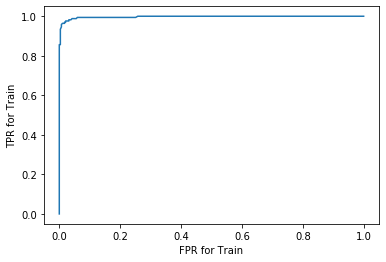

In [24]:
import matplotlib.pyplot as plt

plt.plot(ROC_df['FPR'],ROC_df['TPR'])
plt.xlabel('FPR for Train')
plt.ylabel('TPR for Train')

In [25]:
from sklearn import metrics
AUC_train = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])
print('The AUC for train is : \n',AUC_train)

The AUC for train is : 
 0.997005988023952


In [26]:
y_test_pred_prob = calibrated_svc.predict_proba(X_test)
y_test_pred_prob_0 = y_test_pred_prob[:,0]
print(y_test_pred_prob_0)

[9.41763492e-01 2.92147094e-02 9.65777949e-01 9.19113749e-01
 9.00401923e-01 9.97063160e-01 1.52757764e-02 2.99885905e-02
 2.16733331e-02 3.15224336e-02 9.50798174e-01 6.11059981e-03
 9.86508482e-01 5.12720517e-03 9.94282283e-01 9.99763437e-01
 5.67359182e-01 2.43914534e-01 9.95788531e-01 6.25014918e-02
 5.69796045e-03 2.55416633e-03 8.34022548e-01 7.48865134e-01
 9.84994149e-01 9.85605604e-01 9.95998692e-01 8.76181641e-01
 3.31641516e-02 9.30407618e-01 9.61635839e-01 9.65021806e-01
 9.03174066e-01 7.15132952e-02 3.33784341e-02 9.74703701e-01
 4.37881465e-02 9.66193576e-01 8.74965342e-01 3.13033709e-01
 1.32766005e-01 9.68754220e-01 9.71146146e-01 5.13261824e-01
 7.66035550e-01 6.18726694e-02 6.57237861e-02 7.57619951e-01
 2.99044568e-01 9.83756264e-01 8.41096957e-02 9.95997781e-01
 9.94314752e-01 8.62874014e-01 9.56887434e-02 8.74621724e-01
 9.96548188e-01 1.78585391e-03 1.28632474e-02 9.87371461e-01
 6.89356160e-01 1.21049725e-01 9.99982563e-01 1.24517752e-02
 4.43293952e-01 9.885572

In [27]:
thresh = np.arange(0,1.01,0.01)
ROC_df_test = pd.DataFrame(index=thresh,columns=['FPR','TPR'])
for i in np.arange(0,thresh.size):
    y_test_pred_roc = (y_test_pred_prob_0 <= thresh[i]).astype(int)
    confusion_matrix_test_roc = confusion_matrix(y_test,y_test_pred_roc)
    ROC_df_test.iloc[i,0] = confusion_matrix_test_roc[0][1]/(confusion_matrix_test_roc[0][1]+confusion_matrix_test_roc[0][0])
    ROC_df_test.iloc[i,1] = confusion_matrix_test_roc[1][1]/(confusion_matrix_test_roc[1][1]+confusion_matrix_test_roc[1][0])
print(ROC_df_test)

           FPR       TPR
0.00         0         0
0.01         0  0.186047
0.02         0  0.348837
0.03         0  0.465116
0.04         0  0.534884
...        ...       ...
0.96  0.458333         1
0.97  0.541667         1
0.98  0.611111         1
0.99  0.708333         1
1.00         1         1

[101 rows x 2 columns]


Text(0, 0.5, 'TPR for Test')

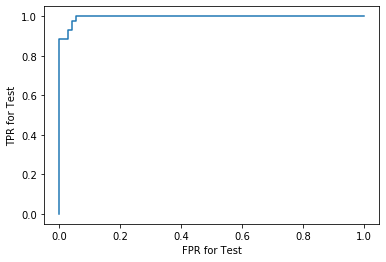

In [28]:
plt.plot(ROC_df_test['FPR'],ROC_df_test['TPR'])
plt.xlabel('FPR for Test')
plt.ylabel('TPR for Test')

In [29]:
AUC_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])
print('The AUC for test is : \n',AUC_test)

The AUC for test is : 
 0.9954780361757106


Again, the various curves, matrices, etc. have been shown for a random Monte Carlo iteration (here only 1 such iteration) and thus won't be shown in the final M=30 Monte-Carlo iterations for a random iteration within. These results are for any arbitrary such random Monte-Carlo trial, in general


NOTE :
After X_train, y_train have been generated via labeled and unlabeled train, the remaining portion of the code is pretty much the same as for the Supervised case due to the face that post-generation of X_train and y_train, we only use X_train, y_train, X_test, y_test for all are subsequent evaluations of various quantities

Again, here CalibratedCV was used to estimate probabilities which are unavailable inherently for LinearSVC

The references mentioned in Supervised_Test were used here as well

Comparison will be done later, after all methods are done with